# Finalysis Demo: Statistical Arbitrage & Pairs Trading Analysis

Welcome to **Finalysis** - a Python package for identifying statistical arbitrage opportunities in stock markets.

## What does this notebook do?
This demo will guide you through:
1. **Loading** historical stock price data
2. **Analyzing** stock pairs for correlation and trading opportunities
3. **Visualizing** price relationships, spreads, and returns

## What is Pairs Trading?
Pairs trading is a market-neutral strategy that identifies two highly correlated stocks. When their price relationship temporarily diverges, you can:
- **Short** the overperforming stock
- **Long** the underperforming stock
- Profit when they revert to their historical relationship

Let's get started! 🚀

In [1]:
import finalysis as fl
from finalysis import load_data


## Step 1: Load the Data 📊

First, we'll load the historical stock price dataset. The dataset contains 5 years of daily stock prices for multiple S&P 500 companies.

**What to expect:** The data includes columns like date, open, high, low, close, volume, and stock name.

In [2]:
data =load_data("data/all_stocks_5yr.csv")

## Step 2: Analyze the Dataset 🔍

Now we'll perform two key analyses:

### 2.1 Dataset Description
The `describe_dataset()` function provides:
- Number of rows and columns
- Data types (numeric vs. non-numeric)
- Preview of the first 5 rows

### 2.2 Pairs Trading Analysis
The `run_analysis()` function identifies the best trading pairs by:
- Computing **correlation** between all stock pairs
- Calculating **hedge ratios** using regression
- Analyzing **spread z-scores** for mean reversion
- Evaluating **Sharpe ratios**, **drawdowns**, and **profit factors**
- Ranking pairs by a composite **arbitrage score**

**Output:** You'll get the top 3 most promising pairs for statistical arbitrage!

In [3]:
from finalysis.metrics import describe_dataset
from finalysis.metrics import run_analysis
describe_dataset(data)
prices, stock_names, top_pairs, unique_dates = run_analysis(data)


Number of rows: 619040
Number of columns: 7

Column details:
date: Non-numeric (dtype=<U10)
open: Numeric (dtype=float64)
high: Numeric (dtype=float64)
low: Numeric (dtype=float64)
close: Numeric (dtype=float64)
volume: Numeric (dtype=int64)
Name: Non-numeric (dtype=<U5)

Total numeric columns: 5
Total non-numeric columns: 2

Preview (first 5 rows):
[('2013-02-08', 15.07, 15.12, 14.63, 14.75,  8407500, 'AAL')
 ('2013-02-11', 14.89, 15.01, 14.26, 14.46,  8882000, 'AAL')
 ('2013-02-12', 14.45, 14.51, 14.1 , 14.27,  8126000, 'AAL')
 ('2013-02-13', 14.3 , 14.94, 14.25, 14.66, 10259500, 'AAL')
 ('2013-02-14', 14.94, 14.96, 13.16, 13.99, 31879900, 'AAL')]


## Step 3: Visualizations 📈

Now let's visualize the data and our findings!

### 3.1 Price Series of All Stocks
This plot shows the historical closing prices of all stocks in the dataset over time.

**What to look for:** Overall market trends, volatile stocks, and general price movements.

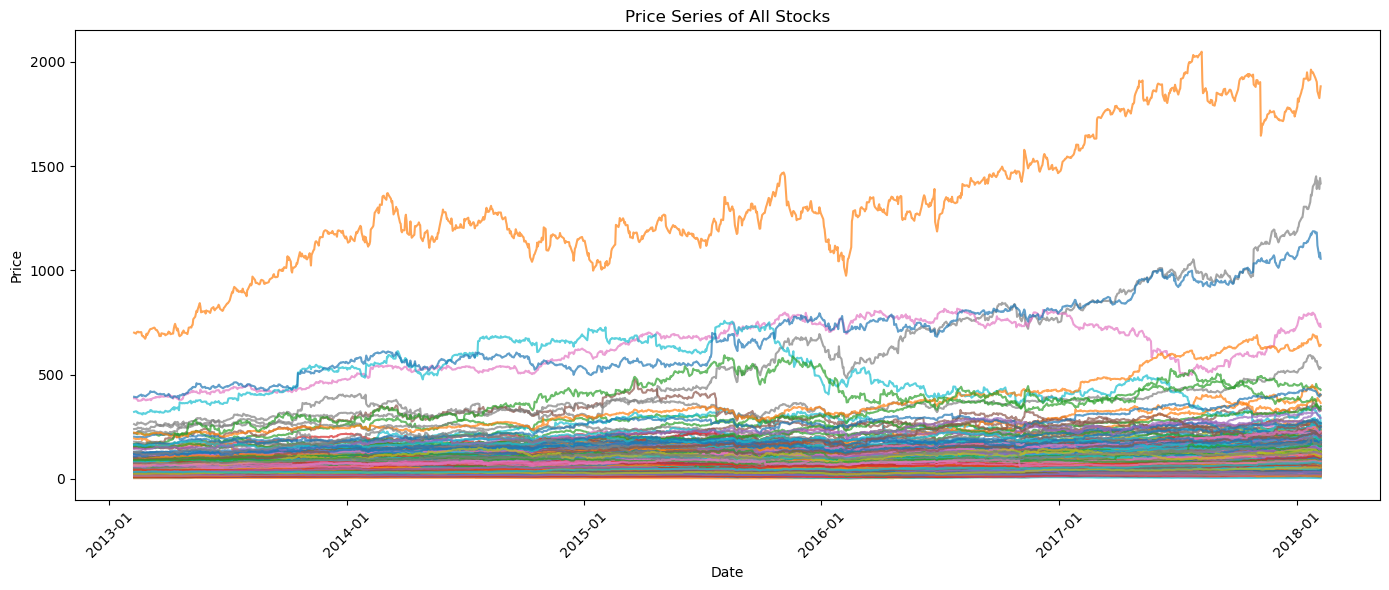

In [4]:
from finalysis.visualisation import plot_price_series
plot_price_series(prices, stock_names, unique_dates)

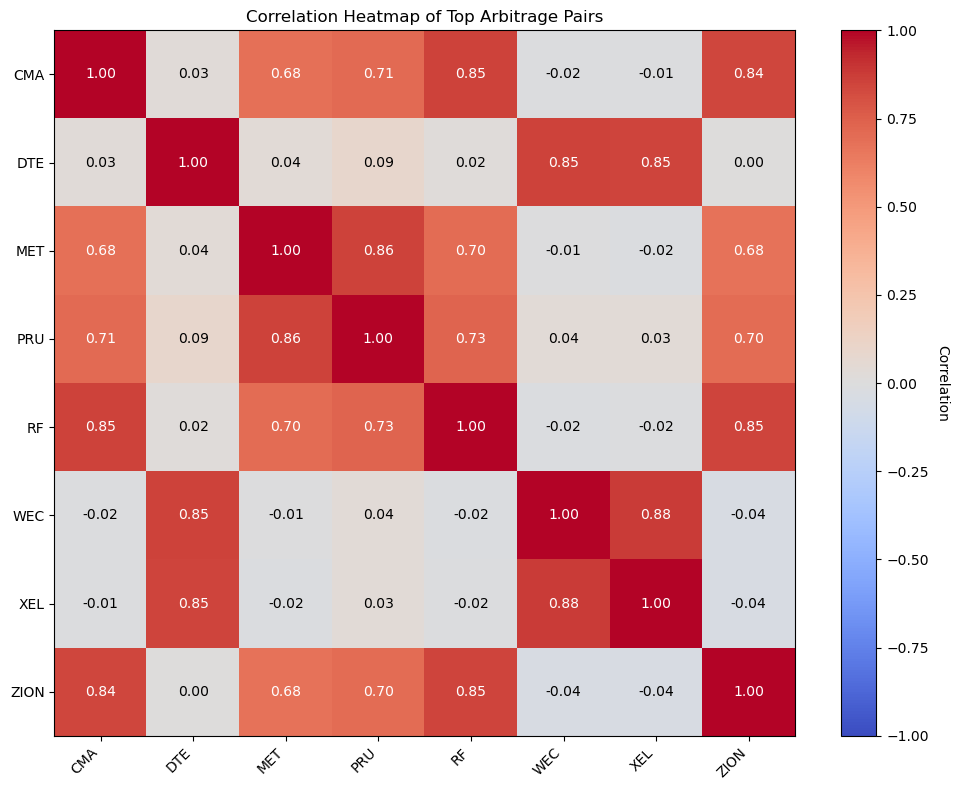

In [5]:
from finalysis.visualisation import plot_top_pairs_heatmap
plot_top_pairs_heatmap(prices, stock_names, top_pairs, unique_dates)

### 3.2 Correlation Heatmap
This heatmap shows the correlation coefficients between the returns of top arbitrage pairs.

**What to look for:** 
- Values close to **1.0** = highly correlated (move together)
- Values close to **-1.0** = negatively correlated (move opposite)
- Darker colors indicate stronger relationships

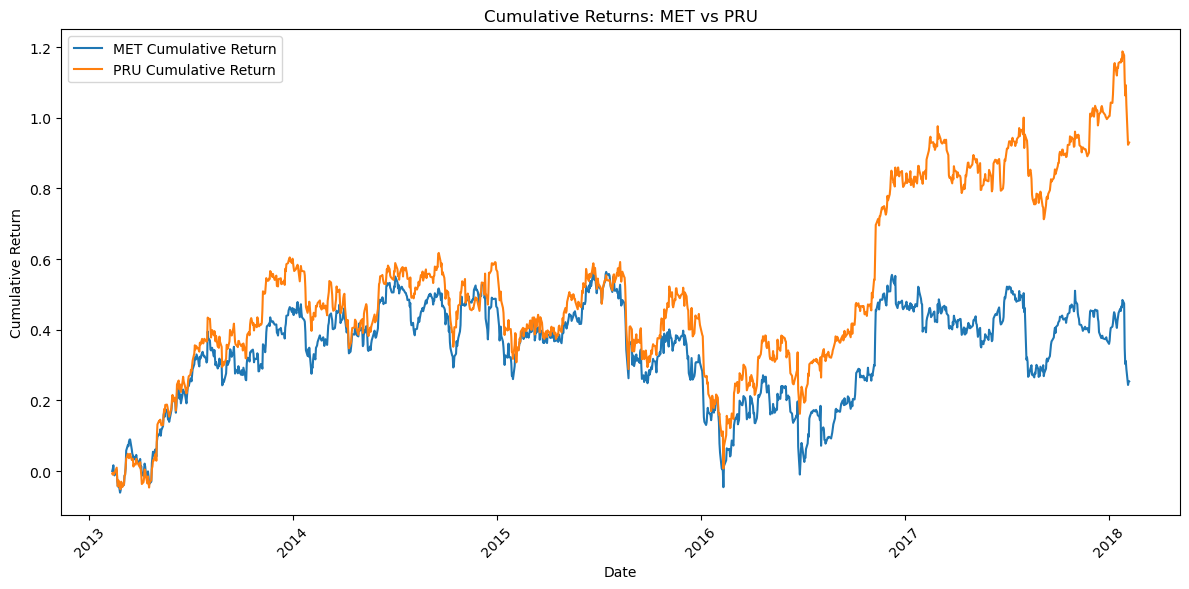

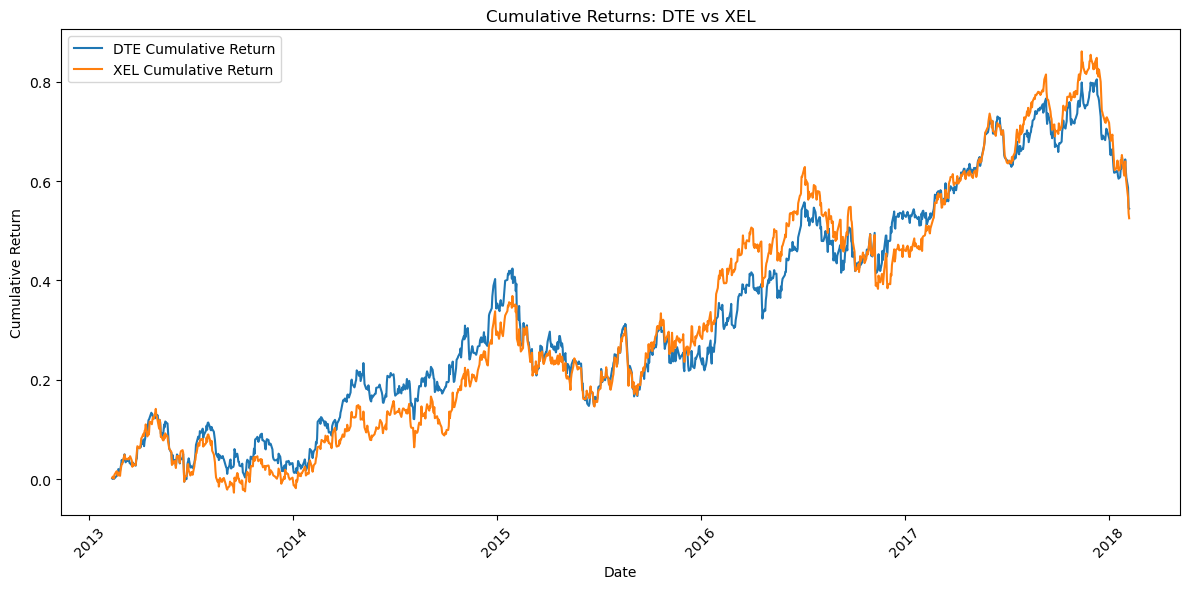

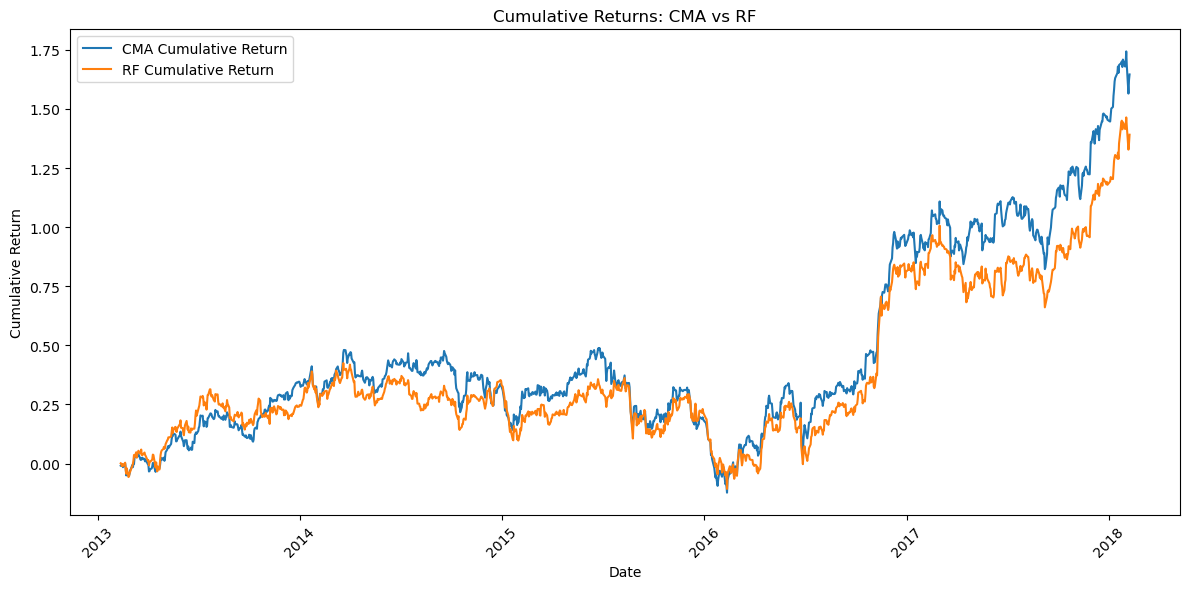

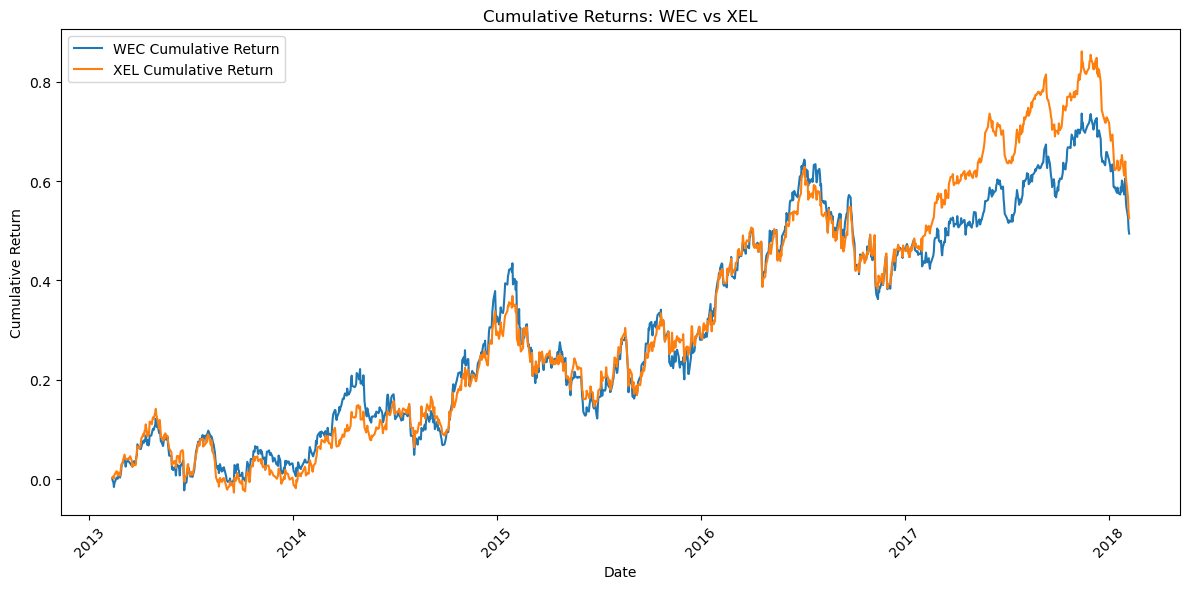

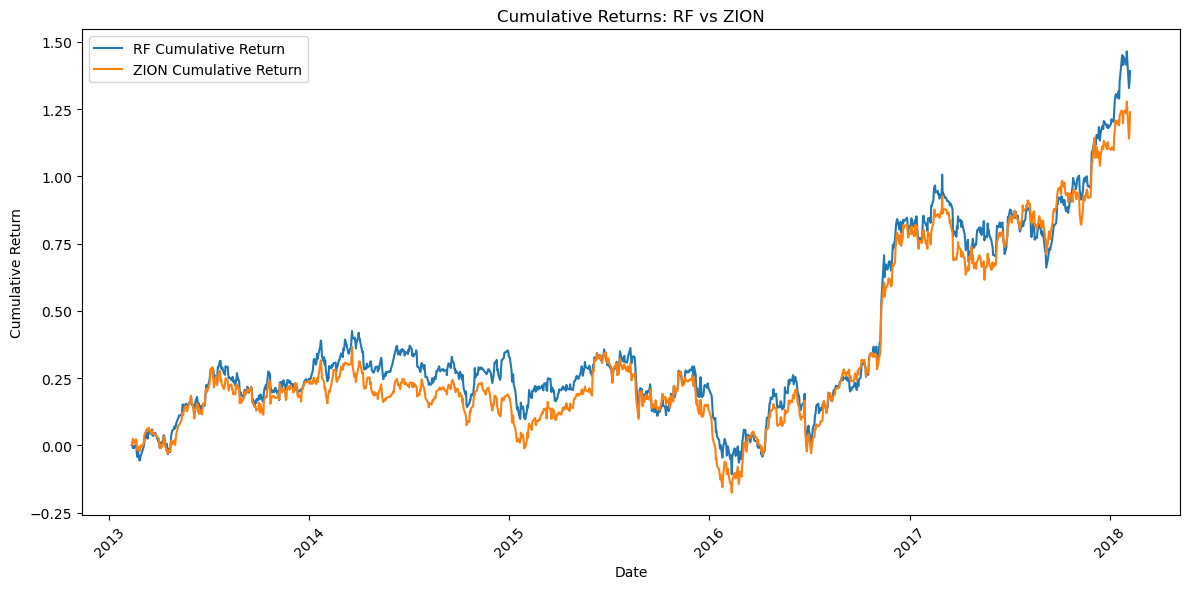

In [6]:
from finalysis.visualisation import plot_cumulative_returns
plot_cumulative_returns(prices, stock_names, top_pairs, unique_dates)

### 3.3 Cumulative Returns Comparison
This chart compares the cumulative returns of the top correlated pairs over time.

**What to look for:**
- Similar trajectories indicate the pairs move together
- Divergences show when one stock outperforms the other
- These divergences are potential trading opportunities!

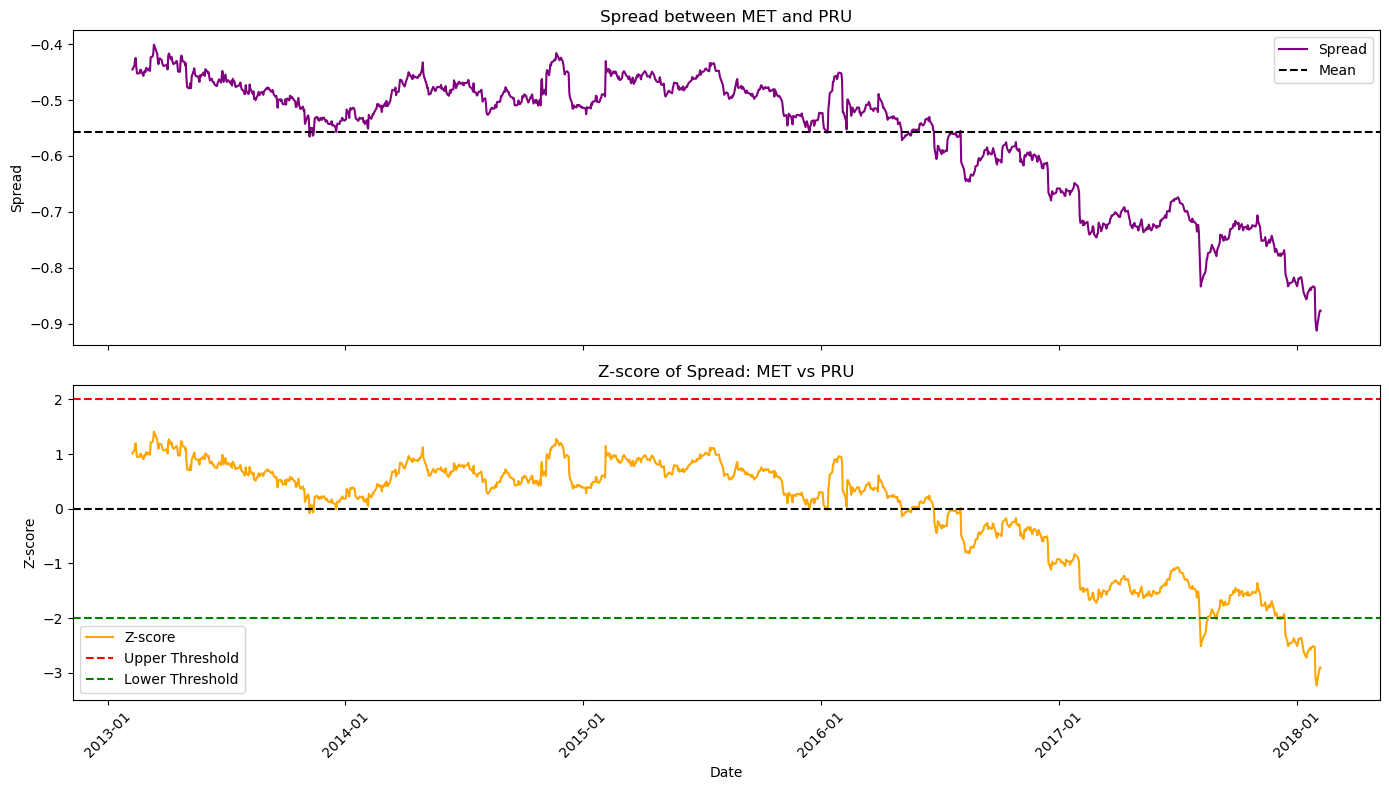

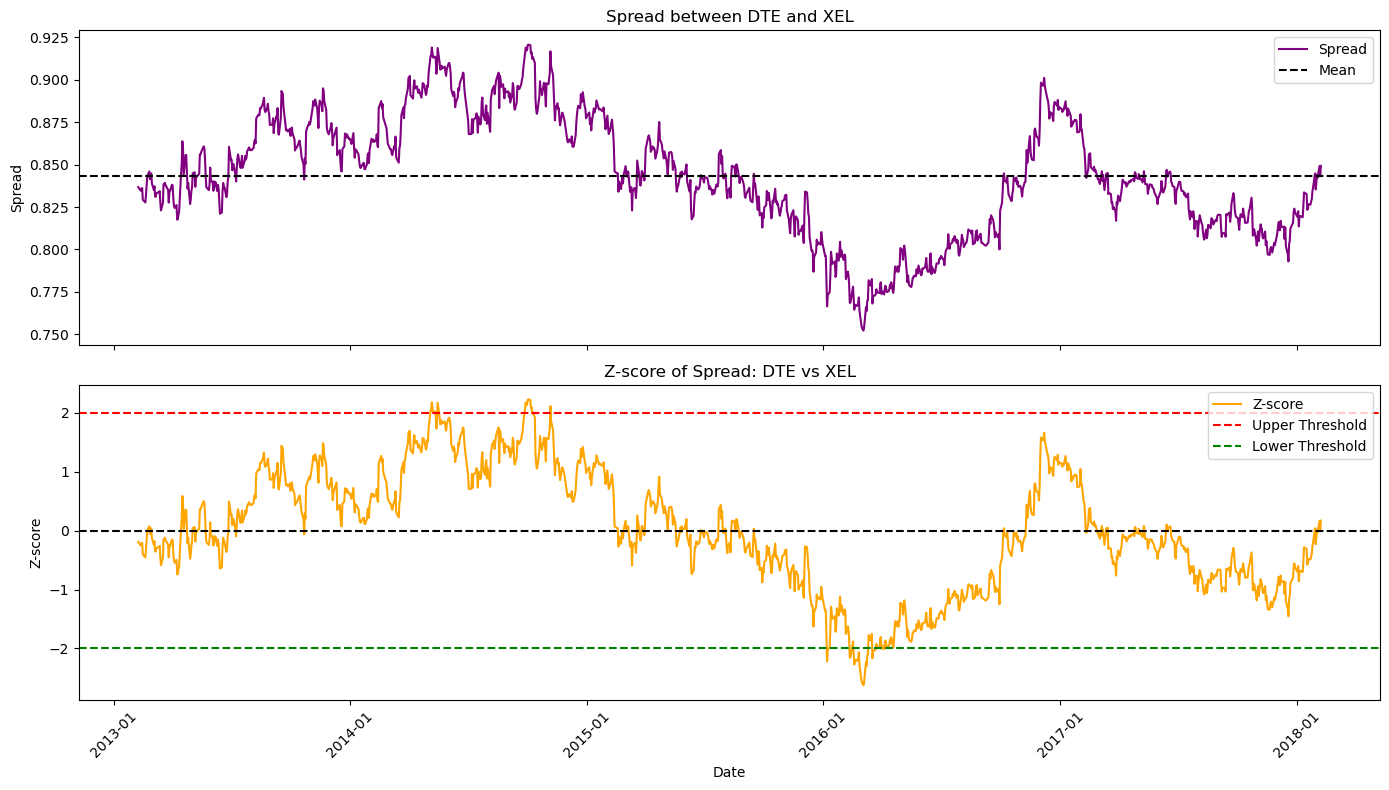

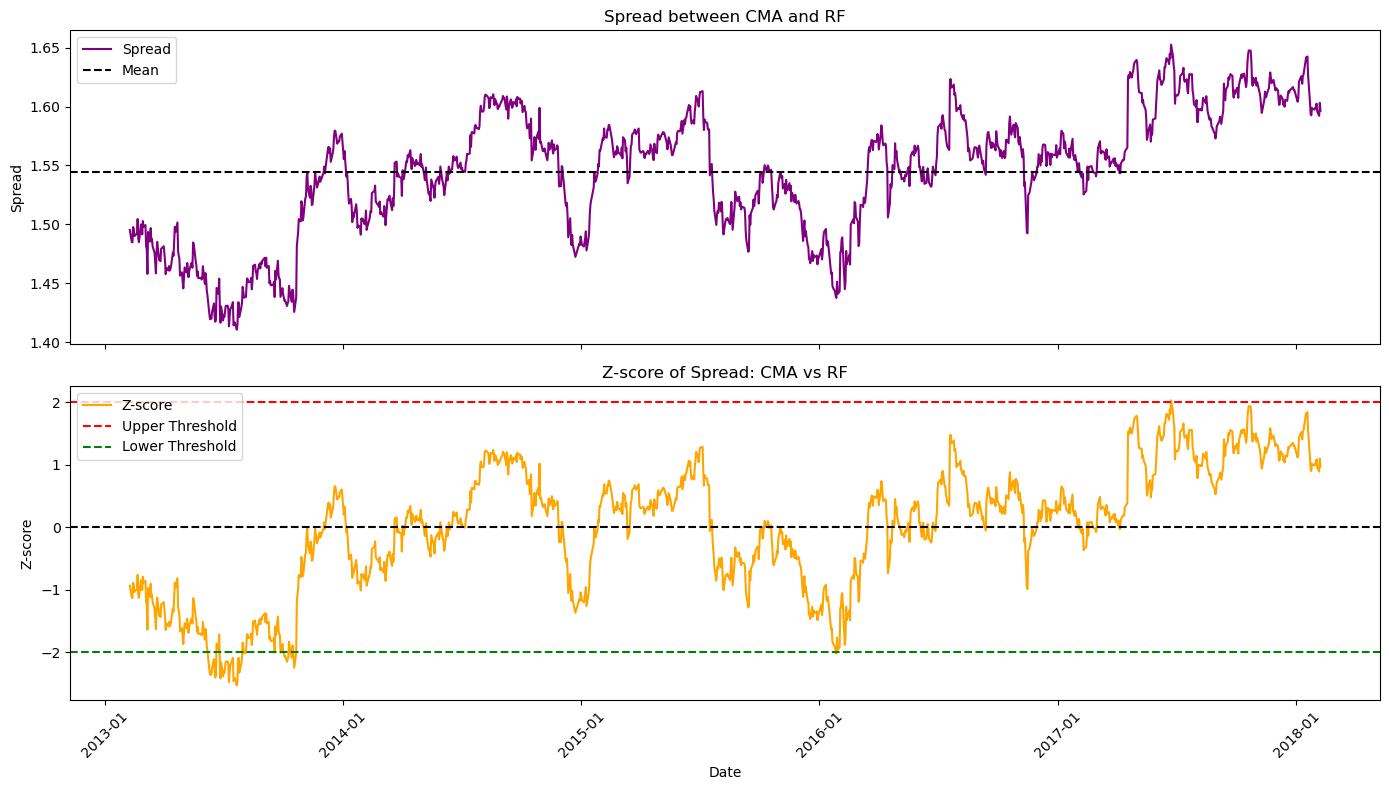

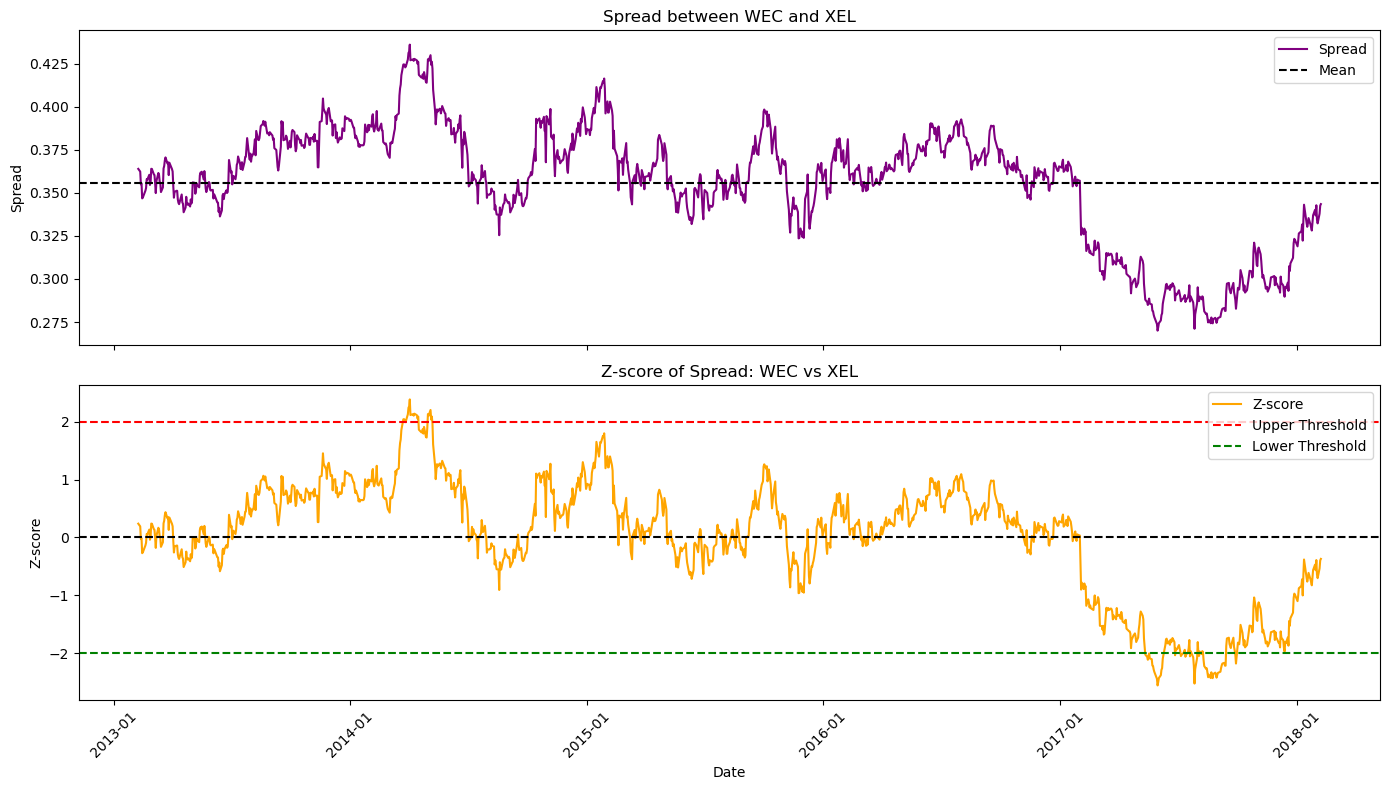

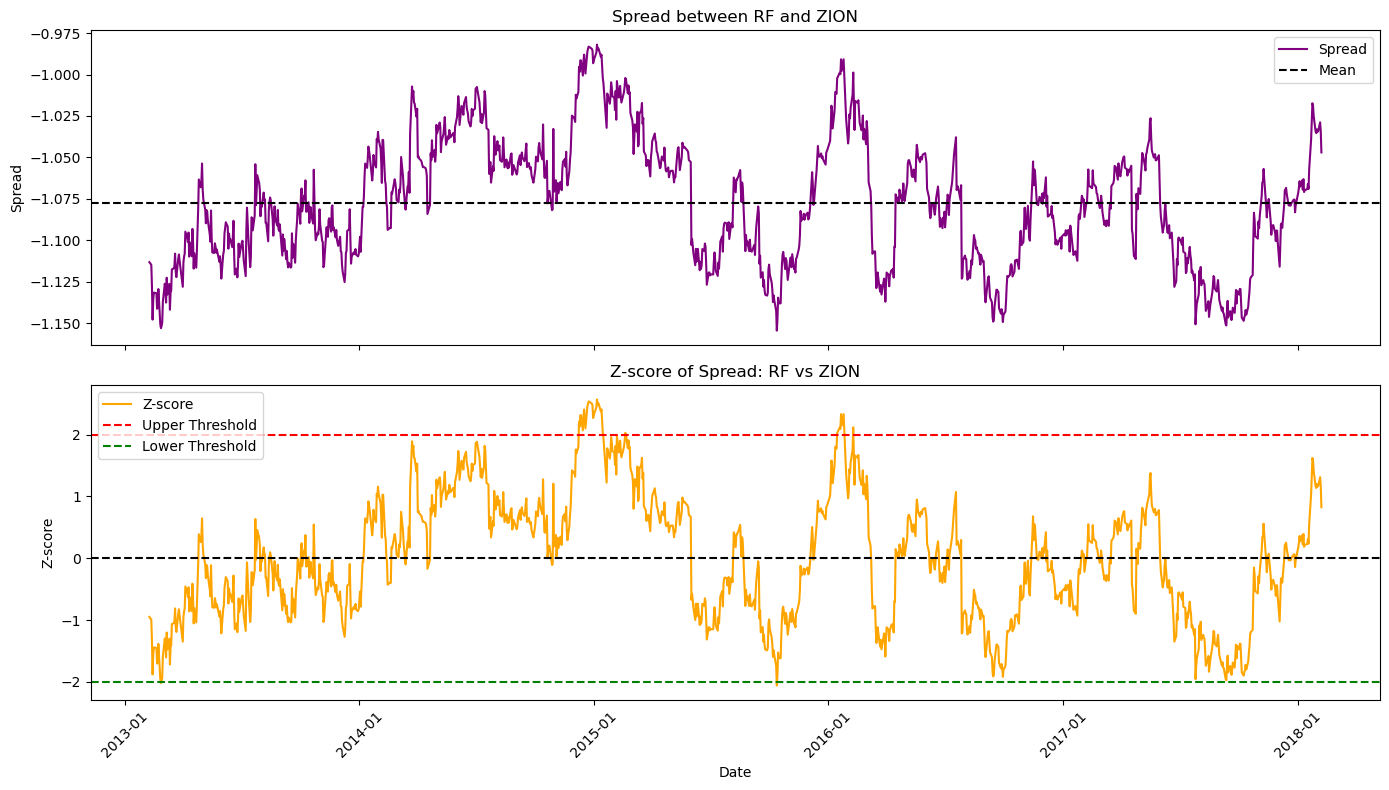

In [7]:
from finalysis.visualisation import plot_spread_zscore
plot_spread_zscore(prices, stock_names, top_pairs, unique_dates)

### 3.4 Spread and Z-Score Analysis
This is the **most important** visualization for pairs trading!

**Top subplot - Spread:**
- Shows the price difference between the pair (in log space)
- Black dashed line = historical mean

**Bottom subplot - Z-Score:**
- Measures how far the spread has deviated from its mean (in standard deviations)
- **Red line (+2):** Spread is unusually high → Consider **shorting** stock 1, **buying** stock 2
- **Green line (-2):** Spread is unusually low → Consider **buying** stock 1, **shorting** stock 2
- **Black line (0):** Mean reversion target

**Trading Signal:** When z-score crosses ±2, the pair might revert to the mean!

### 3.5 Scatter Plots of Returns
These scatter plots show the relationship between daily returns of correlated pairs.

**What to look for:**
- Points clustered along a diagonal line = strong correlation
- Tighter clustering = more reliable relationship
- This validates that the pairs move together consistently

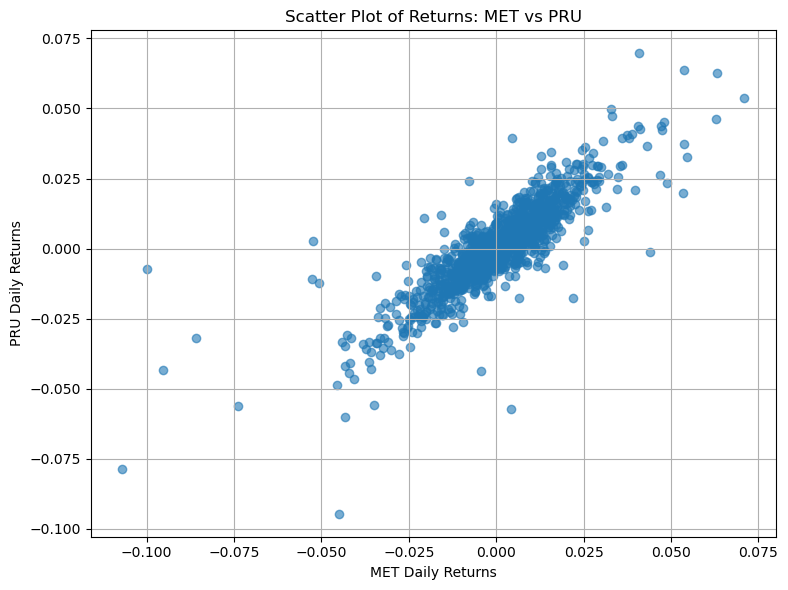

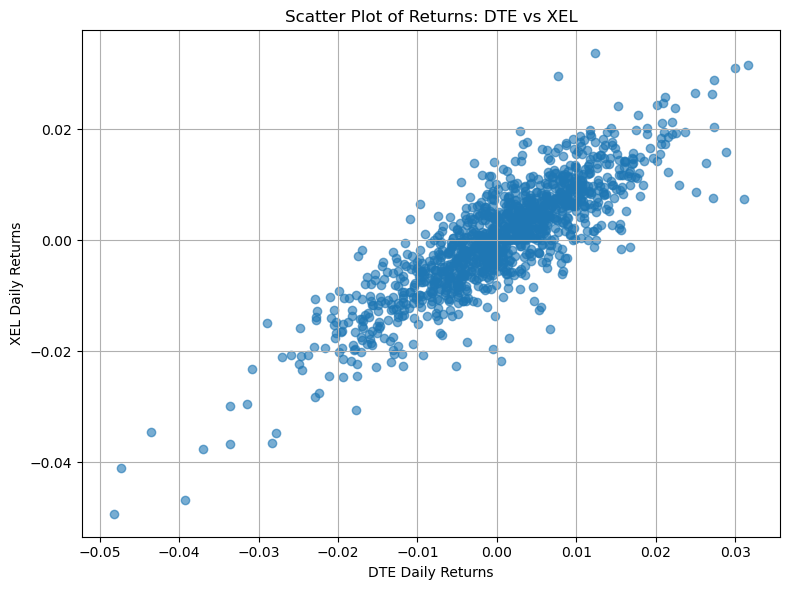

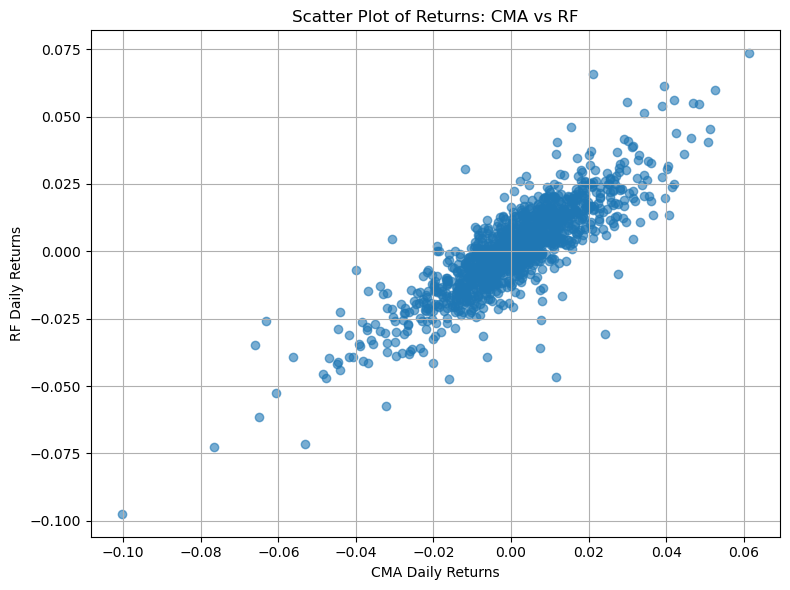

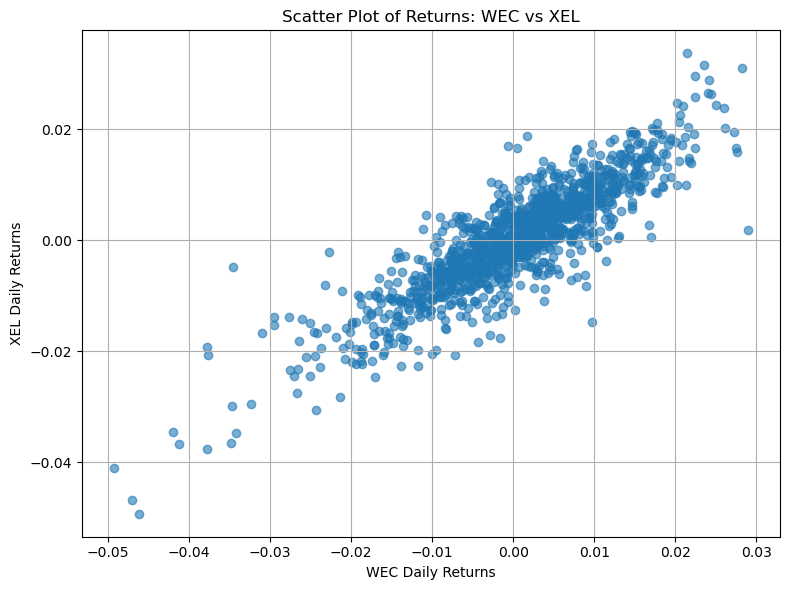

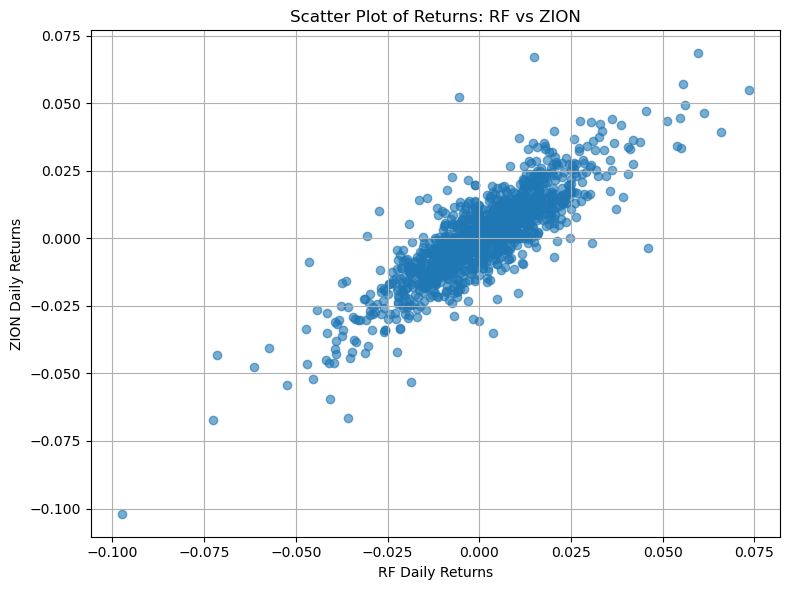

In [8]:
from finalysis.visualisation import plot_top_pairs_scatter
plot_top_pairs_scatter(prices, stock_names, top_pairs)

## Summary & Next Steps 🎯

Congratulations! You've successfully:
✅ Loaded and explored historical stock data  
✅ Identified top correlated pairs for statistical arbitrage  
✅ Visualized price relationships and trading signals  

### Key Takeaways:
- **High correlation** (>0.85) between pairs indicates they typically move together
- **Z-score deviations** (±2) signal potential mean reversion opportunities
- **Spread analysis** helps time entry and exit points for pairs trades

### How to Customize:
You can modify the analysis by changing parameters in `run_analysis()`:
```python
# Example: Use different correlation threshold
prices, stock_names, top_pairs, unique_dates = run_analysis(
    data, 
    corr_threshold=0.90  # Default is 0.85
)
```

### ⚠️ Important Disclaimer:
This is for **educational purposes only**. Pairs trading involves significant risks:
- Correlations can break down unexpectedly
- Mean reversion is not guaranteed
- Transaction costs and slippage affect profitability
- Always conduct thorough backtesting before live trading

**Happy analyzing!** 📊✨